In [2]:
# Install the statsmodels package.
!pip install statsmodels

# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols


# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [4]:
#create new data frame
reviews = pd.read_csv('turtle_reviews.csv')
#sense check new datata frame
print(reviews.head())
print(reviews.dtypes)
print(reviews.info())


   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [5]:
# Determine whether there are missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Determine the descriptive statistics of the data set.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [7]:
# Remove multiple columns
reviews = reviews.drop(['language', 'platform'], axis=1)

# Display the updated DataFrame
print("\nDataFrame after removing columns:")
print(reviews)


DataFrame after removing columns:
      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

    

In [8]:
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

reviews

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [9]:
reviews.to_csv('clean_reviews.csv', index=False)

# Import the saved file to sense-check
clean_reviews = pd.read_csv('clean_reviews.csv')

# Print the shape of the clean DataFrame
print("\nClean DataFrame shape:")
print(clean_reviews.shape)  

# Print the metadata of the clean DataFrame
print("\nClean DataFrame metadata:")
print(clean_reviews.info())  


Clean DataFrame shape:
(2000, 9)

Clean DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


# Relationship between age and loyalty points

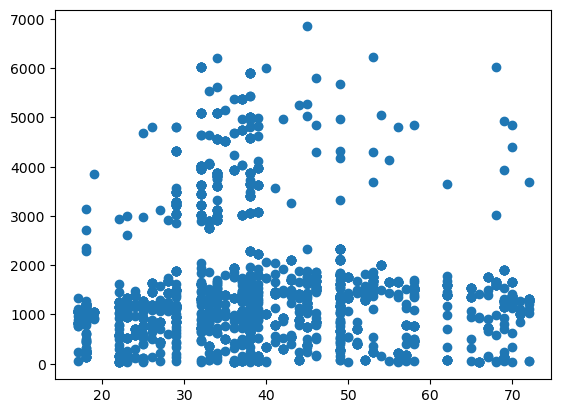

In [10]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variable.
x = clean_reviews[['age']]

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [11]:
# Create formula and pass through OLS methods.
l = 'y ~ x'
test = ols(l, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0577
Time:                        15:48:12   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There does not seem to be any relationship between the age of customers and the number of loyalty points therefore it does not seem necessary to explore this relationship further. In addition an R squared value of 0.002 is close to 0 therefore there is no relationship between the IV and DV.

# Relationship between spending score and loyalty points

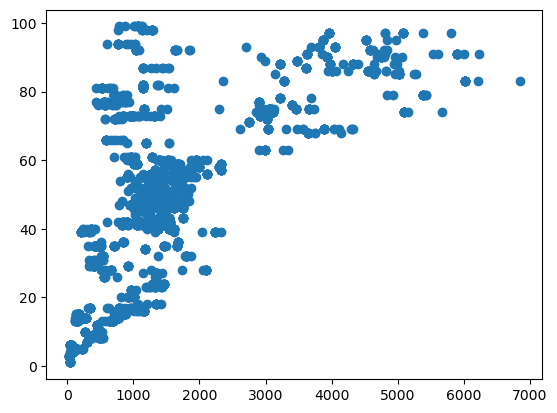

In [49]:
# Define the dependent variable.
y = clean_reviews['spending_score'] 

# Define the independent variable.
x = clean_reviews[['loyalty_points']]

# Check for linearity with Matplotlib.
plt.scatter(x, y)

A relationship exists between spending scores and Loyalty points. 

In [50]:
# Create formula and pass through OLS methods.
l = 'y ~ x'
test = ols(l, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        15:01:19   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [52]:
# Create the linear regression model.

y_pred = (-65.686513) + 34.187825 * clean_reviews['loyalty_points']

# View the output.
y_pred

0         7113.756737
1        17848.733787
2         1301.826487
3        19147.871137
4        12447.057437
            ...      
1995    137745.436062
1996     18361.551162
1997    191864.763037
1998     35763.154087
1999     16310.281662
Name: loyalty_points, Length: 2000, dtype: float64

(0.0, 245719.2188251)

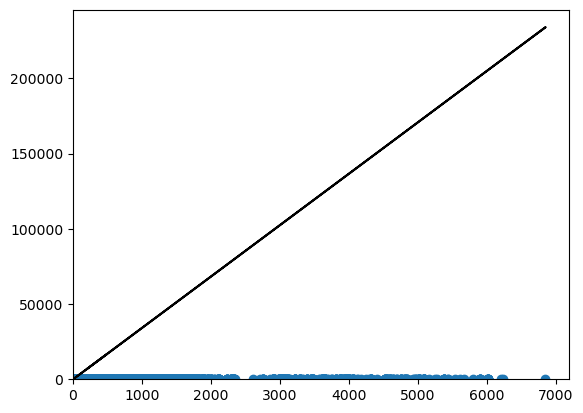

In [53]:
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)


# Relationship between remuneration and loyalty points

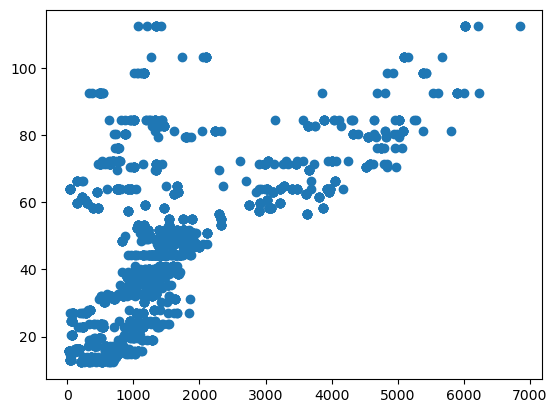

In [54]:
# Define the dependent variable.
y = clean_reviews['remuneration'] 

# Define the independent variable.
x = clean_reviews[['loyalty_points']]

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [55]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test2 = ols(f, data = clean_reviews).fit()

# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        15:02:11   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
x              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept    30.560555
x             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
x            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [57]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-65.686513) + 34.187825 * clean_reviews['loyalty_points']

# View the output.
y_pred

0         7113.756737
1        17848.733787
2         1301.826487
3        19147.871137
4        12447.057437
            ...      
1995    137745.436062
1996     18361.551162
1997    191864.763037
1998     35763.154087
1999     16310.281662
Name: loyalty_points, Length: 2000, dtype: float64

(0.0, 245718.6538251)

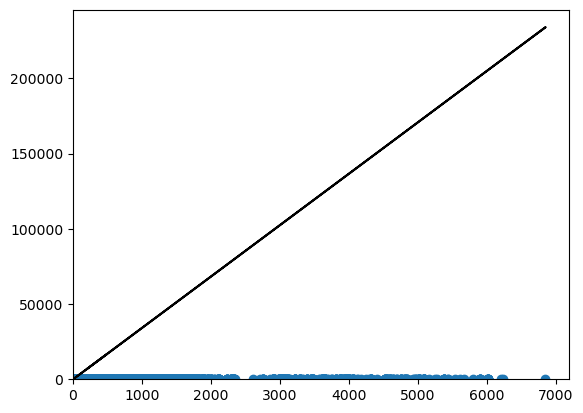

In [58]:
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Relationship between remuneration and spending scores with loyalty points

In [32]:
X = clean_reviews[['remuneration', 'spending_score']]
y = clean_reviews['loyalty_points']


X = sm.add_constant(X)  # add a constant term to the independent variables
model = sm.OLS(y, X).fit()  # create and fit the OLS model

# Extract estimated parameters, standard errors, and predicted values
params = model.params
std_errors = model.bse
predicted_values = model.fittedvalues

# Generate regression table
regression_table = pd.DataFrame({'Coefficients': params, 'Standard Errors': std_errors})
print(regression_table)


                Coefficients  Standard Errors
const           -1700.305097        35.739558
remuneration       33.979499         0.516648
spending_score     32.892695         0.457831


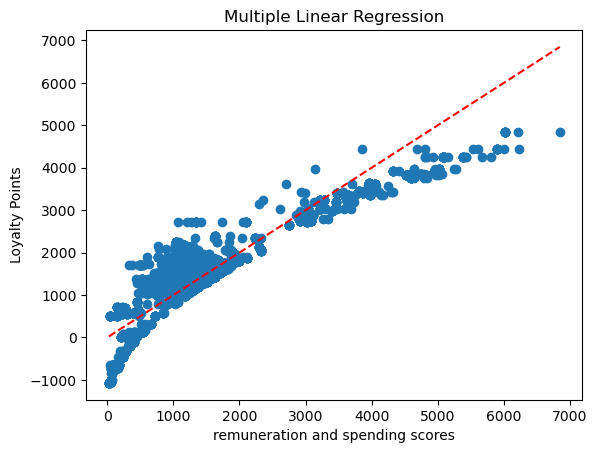

In [34]:
plt.scatter(y, predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # add a diagonal line
plt.xlabel('remuneration and spending scores')
plt.ylabel('Loyalty Points')
plt.title('Multiple Linear Regression')
plt.show()

Observations: A fairly strong positive correlation lies between remuneration and spending scores against loyalty points. Loyalty points are accumulated through spending therefore the more a customer spends at Turtle Games the more loyalty points accumulated. In turn customers with a higher income tend to spend more. 

# Assignment Activity 2

In [3]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
!pip install yellowbrick


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer


import warnings
warnings.filterwarnings('ignore')

In [4]:
# create data frame with remuneration and spending scores 
df = pd.read_csv('clean_reviews.csv')  
df2 = df[['remuneration', 'spending_score']]
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [5]:
#view Dataframe
print(df2.head())

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40


<Axes: xlabel='remuneration', ylabel='spending_score'>

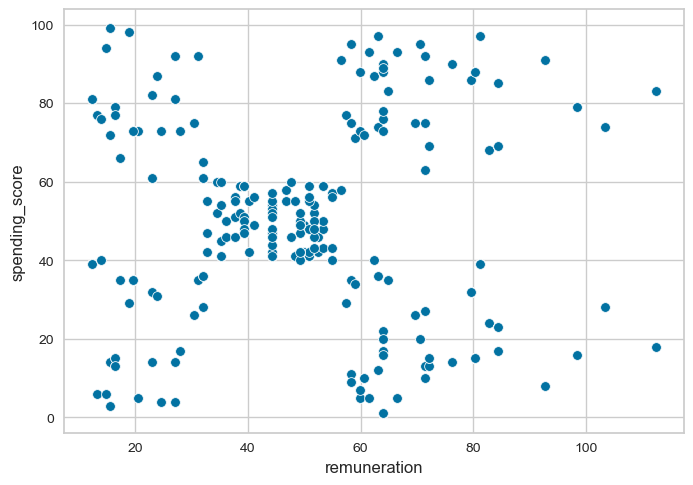

In [6]:
# plot remuneration against spending using sns.scatterplot
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

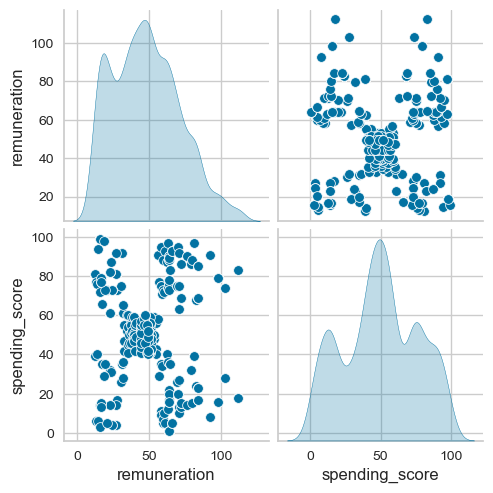

In [7]:
#create a pairplot with seaborn 
x = df2[['remuneration','spending_score']]
sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

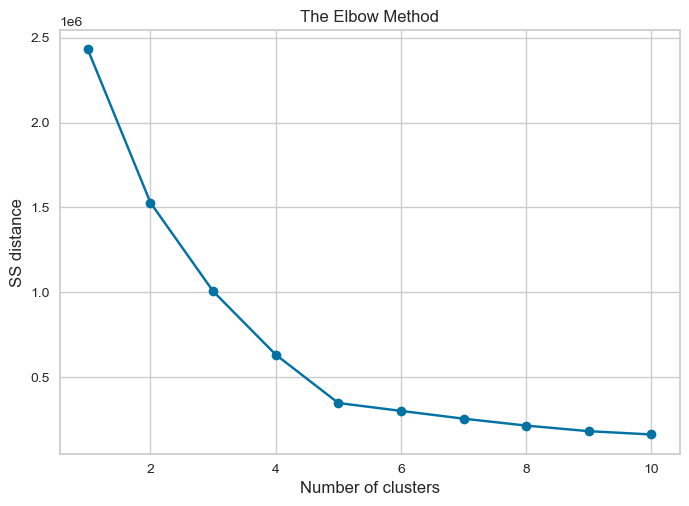

In [8]:
# Import the KMeans class.
from sklearn.cluster import KMeans 
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

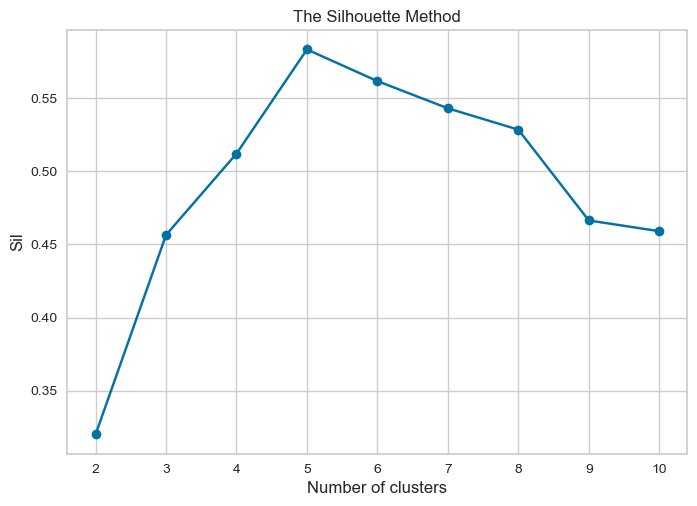

In [9]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

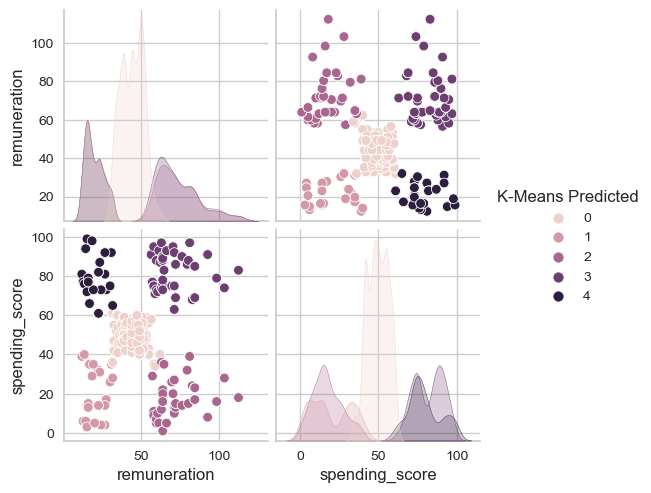

In [12]:
# Use five clusters and ceate pair plot
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

observation: There are 5 distinct clusters and maybe a few outliers. 0 is the largest class.

In [13]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [14]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<Axes: xlabel='remuneration', ylabel='spending_score'>

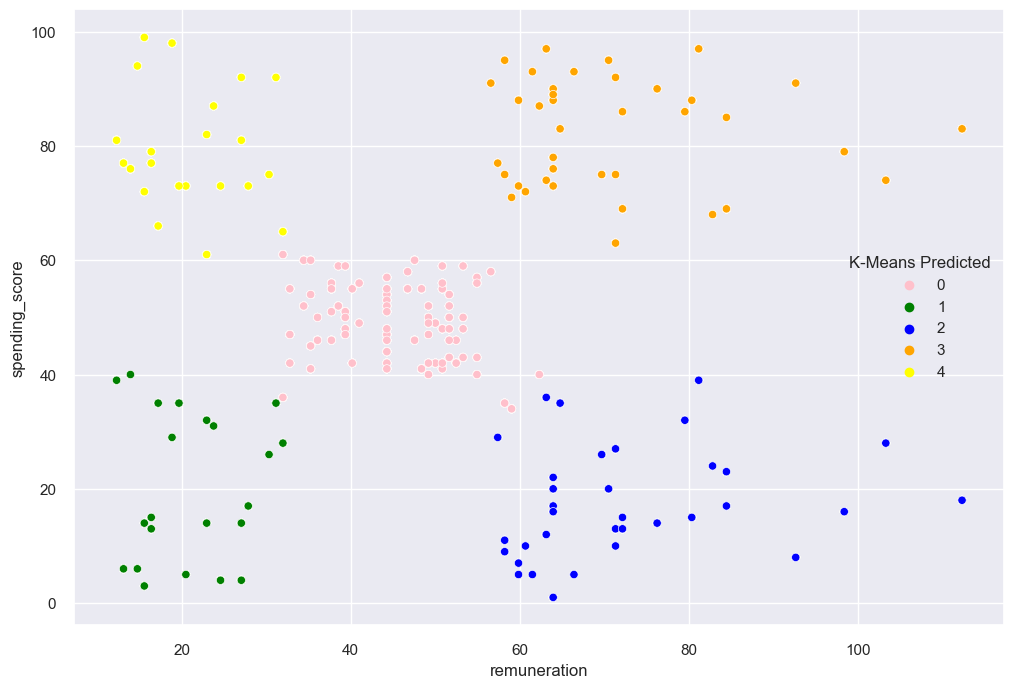

In [15]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['pink', 'green', 'blue', 'orange', 'yellow'])

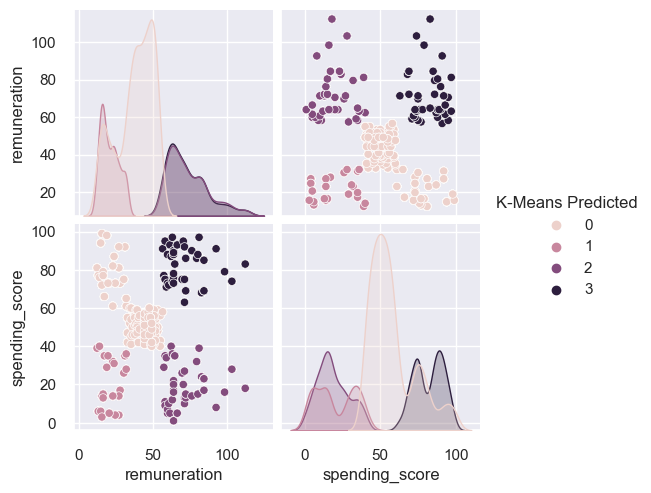

In [16]:
# Use four clusters to create pairplot.
kmeans = KMeans(n_clusters =4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [13]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

KeyError: 'K-Means Predicted'

observation: Cluster 0 has 1013 data points.
Cluster 3 has 356 data points.
Cluster 2 has 351 data points.
Cluster 1 has 280 data points.

In [14]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['pink', 'green', 'blue', 'orange'])

ValueError: Could not interpret value `remuneration` for parameter `x`

Observation : There are 5 distinct customer base subgroups which can be targed using specific marketing campaigns.

# Assignment Activity 3

In [22]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
!pip install wordcloud
!pip install textblob

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00


In [61]:
import pandas as pd
df = pd.read_csv('clean_reviews.csv')  # Replace 'your_csv_file.csv' with your actual file path
df3 = df[['summary', 'review']]
df3

,summary,review
0,The fact that 50% of this space is wasted on a...,"When it comes to a DM's screen, the space on t..."
1,Another worthless Dungeon Master's screen from...,An Open Letter to GaleForce9*:\n\nYour unpaint...
2,"pretty, but also pretty useless","Nice art, nice printing. Why two panels are f..."
3,Five Stars,Amazing buy! Bought it as a gift for our new d...
4,Money trap,As my review of GF9's previous screens these w...
...,...,...
1995,The perfect word game for mixed ages (with Mom,The perfect word game for mixed ages (with Mom...
1996,Super fun,Great game. Did not think I would like it whe...
1997,Great Game,Great game for all.........\nKeeps the mind ni...
1998,Four Stars,fun game!


In [62]:
# Determine the number of rows where the comments are not populated
df3['summary'].isna().sum()
df3['review'].isna().sum()

0

In [64]:
# Drop the empty rows.
df3.dropna(subset=['summary'], inplace=True)

# View the shape of the DataFrame.
df3.shape

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\1410423508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset=['summary'], inplace=True)


(2000, 2)

In [65]:
df3.dropna(subset=['review'], inplace=True)
# View the shape of the DataFrame.
df3.shape

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\1966793211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset=['review'], inplace=True)


(2000, 2)

In [66]:
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\425074899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [67]:
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\3520117433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [68]:
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\3435452154.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['summary'] = df3['summary'].str.replace('[^\w\s]','')
C:\Users\trish\AppData\Local\Temp\ipykernel_13708\3435452154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['summary'] = df3['summary'].str.replace('[^\w\s]','')


0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [69]:
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

C:\Users\trish\AppData\Local\Temp\ipykernel_13708\2251060464.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['review'] = df3['review'].str.replace('[^\w\s]','')
C:\Users\trish\AppData\Local\Temp\ipykernel_13708\2251060464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['review'] = df3['review'].str.replace('[^\w\s]','')


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [70]:
df3

,summary,review
0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,five stars,amazing buy bought it as a gift for our new dm...
4,money trap,as my review of gf9s previous screens these we...
...,...,...
1995,the perfect word game for mixed ages with mom,the perfect word game for mixed ages with mom ...
1996,super fun,great game did not think i would like it when ...
1997,great game,great game for all keeps the mind nimble
1998,four stars,fun game


In [74]:
# Check the number of duplicate values in the COMMENTS column.
df3.summary.duplicated().sum()


649

In [73]:
df3.review.duplicated().sum()

50

In [75]:
# Drop duplicates.
df3 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df3.reset_index(inplace=True)
df3.head()

,index,summary,review
0,0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,3,five stars,amazing buy bought it as a gift for our new dm...
4,4,money trap,as my review of gf9s previous screens these we...


In [76]:
# Drop duplicates.
df3 = df3.drop_duplicates(subset=['review'])

# Preview data.
df3.reset_index(inplace=True)
df3.head()

,level_0,index,summary,review
0,0,0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...
1,1,1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...
2,2,2,pretty but also pretty useless,nice art nice printing why two panels are fill...
3,3,3,five stars,amazing buy bought it as a gift for our new dm...
4,4,4,money trap,as my review of gf9s previous screens these we...


In [77]:
# View the shape of the data.
df3.shape

(1350, 4)

In [78]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
# Tokenise the words.
df3['tokens'] = df3['summary'].apply(word_tokenize)

# Preview data.
df3['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [80]:
# Tokenise the words.
df3['tokens'] = df3['review'].apply(word_tokenize)

# Preview data.
df3['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [81]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df3.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df3['tokens'][i]

In [82]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [83]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [84]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


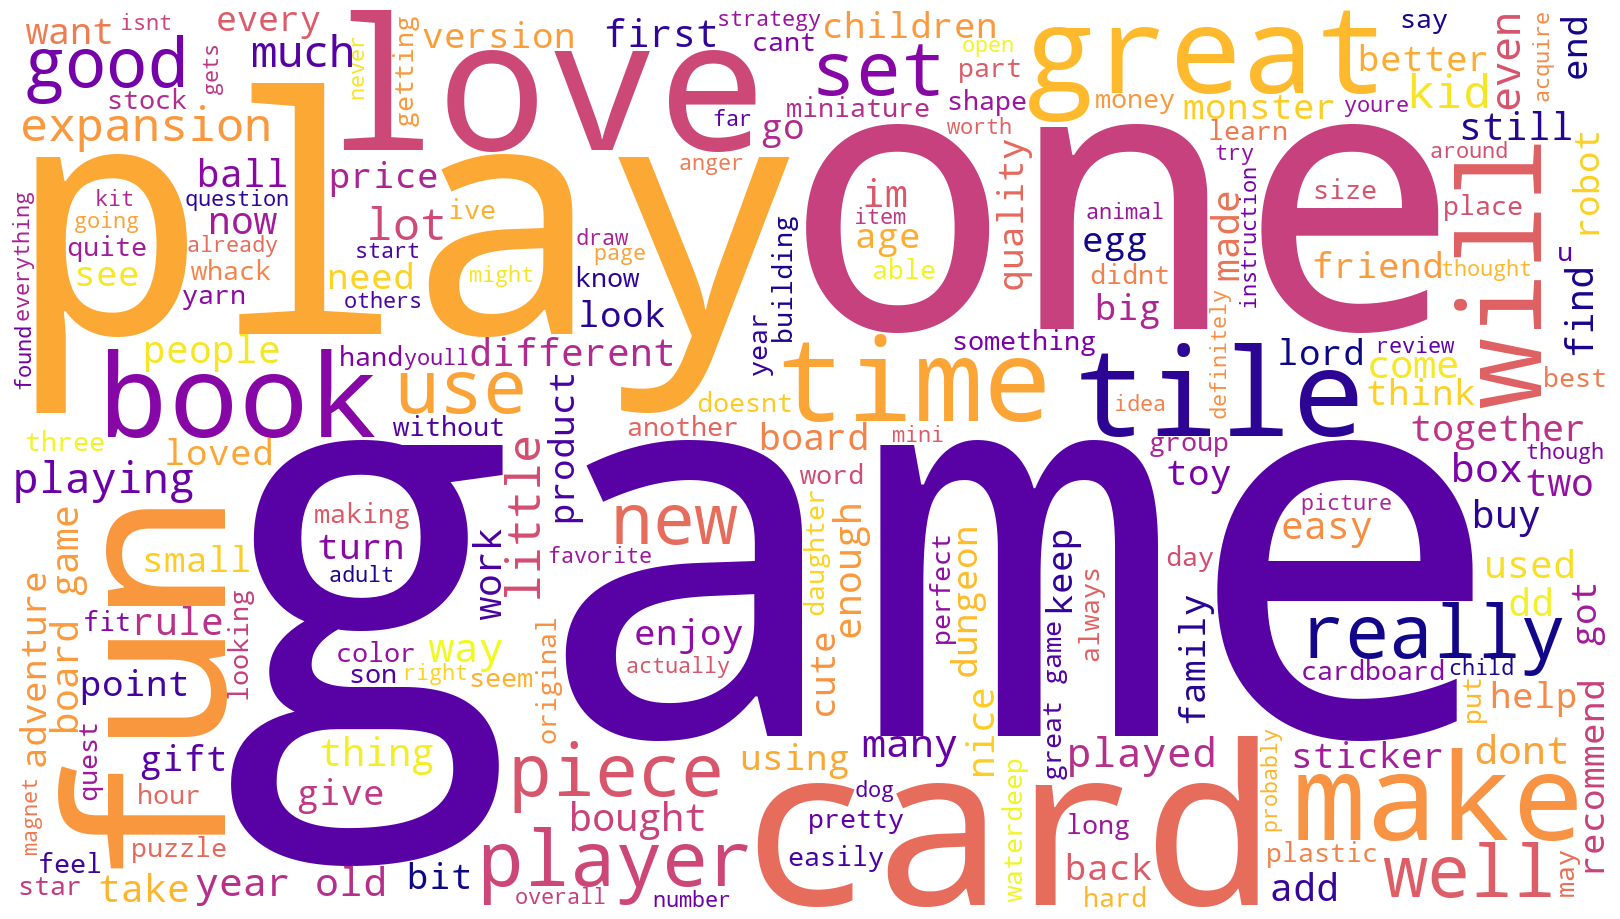

In [85]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

Observation: Overall customer feedback is mostly positive. 

In [86]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [87]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


observation: game is most frequent word 

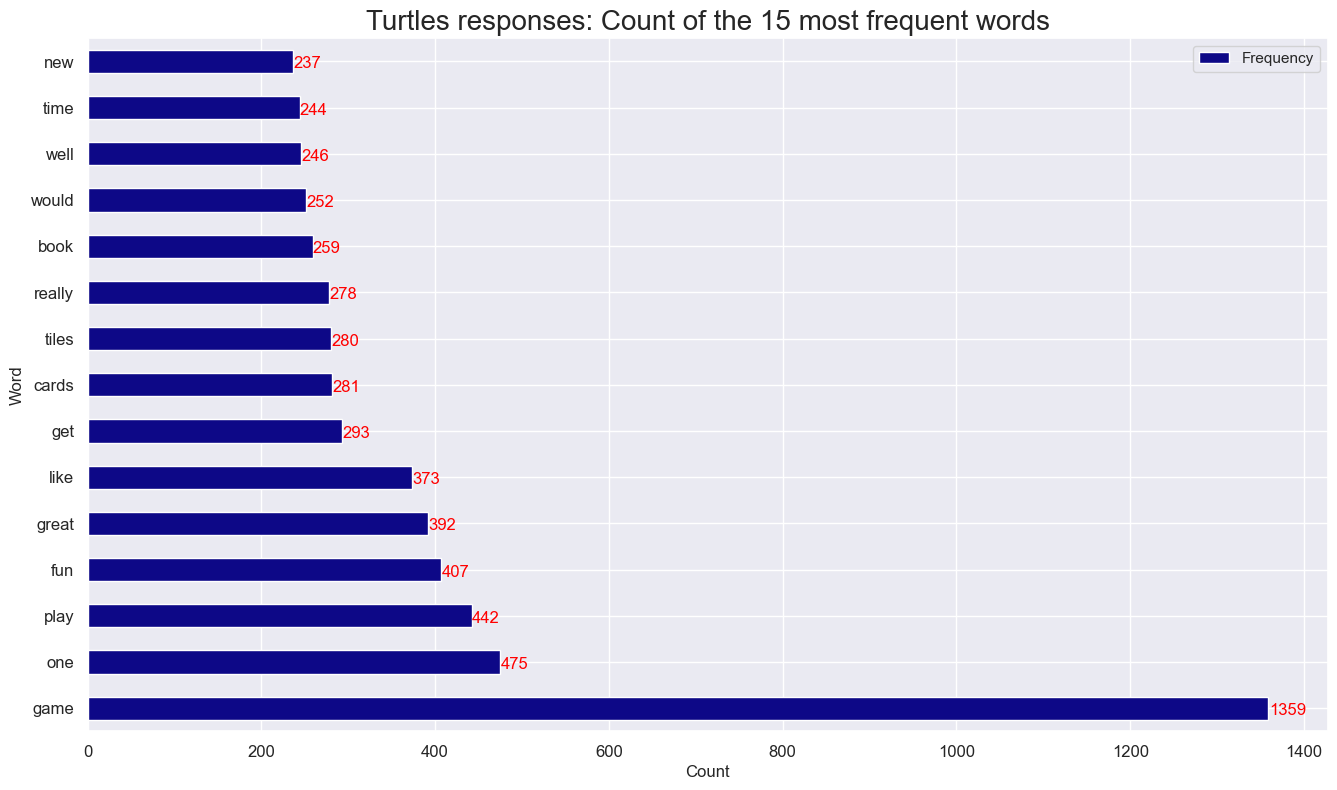

In [89]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtles responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),fontsize=12, color='red')

In [112]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Populate a new column with polarity scores for each comment.
df3['polarity'] = df3['summary'].apply(generate_polarity)

# Preview the result.
df3['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

Index 0: The sentiment is slightly positive with a polarity score of 0.15.
Index 1: The sentiment is strongly negative with a polarity score of -0.80.
Index 2, 3, 4: The sentiments are neutral with polarity scores of 0.00.

In [113]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(review):
    return TextBlob(review).sentiment[0]

# Populate a new column with polarity scores for each comment.
df3['polarity'] = df3['review'].apply(generate_polarity)

# Preview the result.
df3['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

Index 0: The sentiment is slightly negative with a polarity score of -0.036111.
Index 1: The sentiment is slightly positive with a polarity score of 0.035952.
Index 2: The sentiment is slightly positive with a polarity score of 0.116640.
Index 3: The sentiment is strongly positive with a high polarity score of 0.578788.
Index 4: The sentiment is moderately negative with a polarity score of -0.316667.

In [114]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(summary):
    return TextBlob(summary).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df3['subjectivity'] = df3['summary'].apply(generate_subjectivity)

# Preview the result.
df3['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

Index 0: The text is moderately subjective with a subjectivity score of 0.500000. This suggests that the text expresses opinions, feelings, or emotions to some extent.
Index 1: The text is highly subjective with a subjectivity score of 0.900000. This indicates that the text is more opinionated, emotional, or expressive.
Index 2: The text is moderately subjective with a subjectivity score of 0.733333. It also shows some degree of opinion or subjectivity.
Index 3, 4: The text is objective with subjectivity scores of 0.000000. This suggests that the text is more factual and less opinionated or emotional.

In [115]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(review):
    return TextBlob(review).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df3['subjectivity'] = df3['review'].apply(generate_subjectivity)

# Preview the result.
df3['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

Index 0: The text is moderately subjective with a subjectivity score of 0.486111. This suggests that the text expresses opinions, feelings, or emotions to some extent.
Index 1: The text is moderately subjective with a subjectivity score of 0.442976. It also shows some degree of opinion or subjectivity.
Index 2: The text is moderately subjective with a subjectivity score of 0.430435. This indicates that the text has some level of subjectivity and is not entirely objective.
Index 3: The text is highly subjective with a subjectivity score of 0.784848. This suggests that the text is more opinionated, emotional, or expressive.
Index 4: The text is moderately subjective with a subjectivity score of 0.316667. It also shows some degree of opinion or subjectivity.

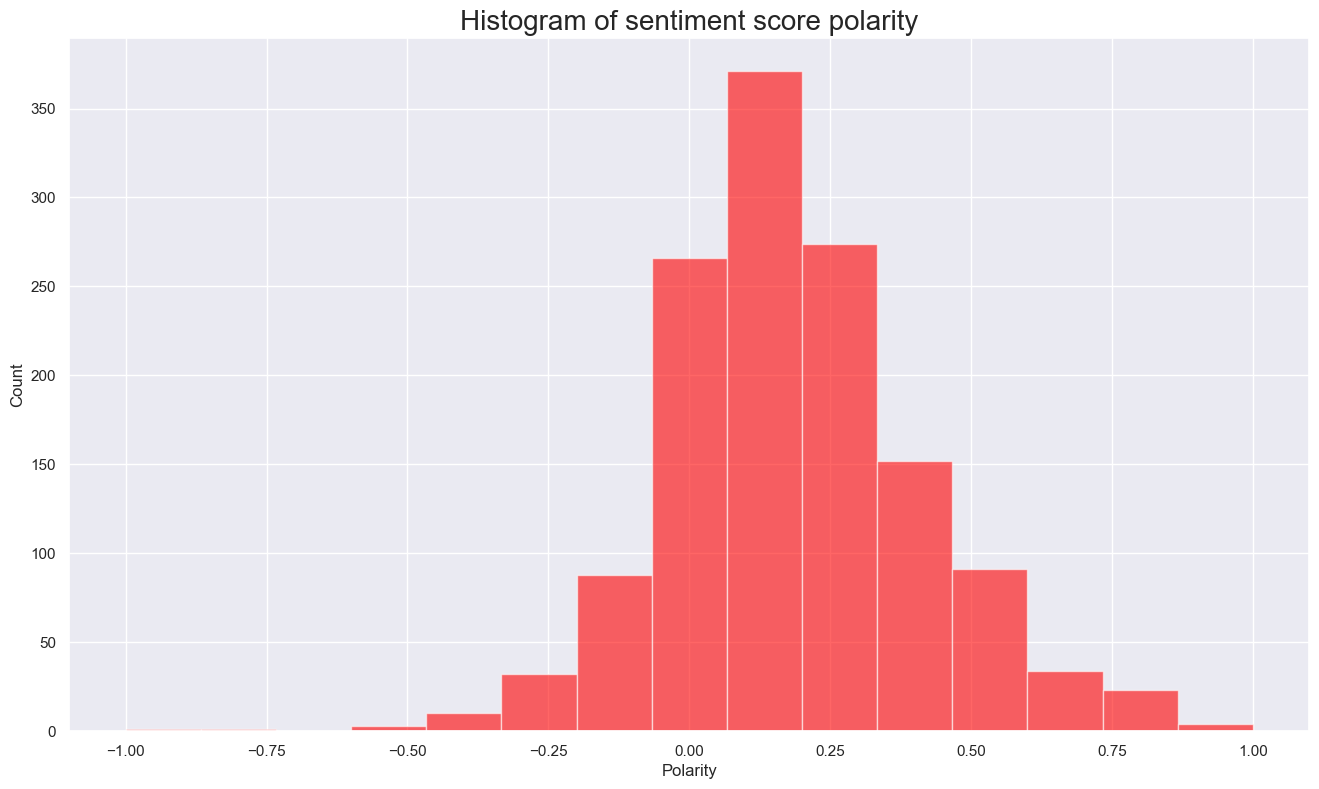

In [116]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

sentiment is fairly neutral but mostly postive over negative

In [ ]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['Subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show()

sentiment is fairly neutral but mostly postive over negative

In [118]:
# Create a DataFrame.
positive_sentiment = df3.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'review', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})


,summary,review,polarity,subjectivity
564,aquire game,perfect,1.000000,1.000000
1081,awesome seller thank you,my daughter loves her stickers awesome seller thank you,1.000000,1.000000
1335,tutoring,perfect for tutoring my grandson in spelling,1.000000,1.000000
891,excellent tile set,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000,0.860000
498,great quality very cute and perfect for my toddler,great quality very cute and perfect for my toddler,0.816667,0.916667
31,the pictures are great ive done one and gave it to a,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000,0.750000
336,great for kids,great seller happy with my purchase 5 starrrr,0.800000,0.875000
439,great easter gift for kids,great easter gift for kids,0.800000,0.750000
491,cute letters,these are great,0.800000,0.750000
575,great,great,0.800000,0.750000


In [119]:
# Create a DataFrame.
negative_sentiment = df3.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'review', 'polarity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,review,polarity
165,boring unless you are a craft person which i am,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
147,incomplete kit,incomplete kit very disappointing,-0.780000
267,anger control game,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
90,stickers,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
141,faulty product,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667
251,frustating,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250
382,hmmm,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741
312,this game although it appears to be like uno and have an easier play method it was,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000
355,it was recommended by a counselor at school that works with him,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000
714,like me used to play dd,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000


In [120]:
# Install spaCy.
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 2.1/2.1 MB 16.6 MB/s eta 0:00:00
     ------------------------------------- 804.0/804.0 kB 25.6 MB/s eta 0:00:00
     ---------------------------------------- 64.5/64.5 kB ? eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\trish\anaconda3\python.exe -m pip install -U pip setuptools wheel


     --------------------------------------- 12.3/12.3 MB 18.2 MB/s eta 0:00:00
     ------------------------------------- 480.9/480.9 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 8.2 MB/s eta 0:00:00
     --------------------------------------- 12.8/12.8 MB 21.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [122]:
# Install the spaCy library.
!pip install spaCy

# Import the library.
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(summary):
 return [(ent.text.strip(), ent.label_) for ent in nlp(summary).ents]
df3['named_entities'] = df3['summary'].apply(generate_named_entities)

df3.head()

,level_0,index,summary,review,tokens,Polarity,polarity,subjectivity,named_entities
0,0,0,the fact that 50 of this space is wasted on ar...,when it comes to a dms screen the space on the...,"[when, it, comes, to, a, dms, screen, the, spa...",-0.036111,-0.036111,0.486111,"[(50, CARDINAL)]"
1,1,1,another worthless dungeon masters screen from ...,an open letter to galeforce9 your unpainted mi...,"[an, open, letter, to, galeforce9, your, unpai...",0.035952,0.035952,0.442976,"[(galeforce9, ORG)]"
2,2,2,pretty but also pretty useless,nice art nice printing why two panels are fill...,"[nice, art, nice, printing, why, two, panels, ...",0.116640,0.116640,0.430435,[]
3,3,3,five stars,amazing buy bought it as a gift for our new dm...,"[amazing, buy, bought, it, as, a, gift, for, o...",0.578788,0.578788,0.784848,"[(five, CARDINAL)]"
4,4,4,money trap,as my review of gf9s previous screens these we...,"[as, my, review, of, gf9s, previous, screens, ...",-0.316667,-0.316667,0.316667,[]


In [123]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if df3['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(df3['summary'][i]), style='ent', jupyter=True)

KeyError: 1350